In [1]:
import os
import matplotlib.pyplot as plt
import aps_ai

from aps_ai.beamline34IDC.simulation.facade.source_interface import Sources, StorageRing
from aps_ai.beamline34IDC.simulation.facade.source_factory import source_factory_method, Implementors
from aps_ai.beamline34IDC.simulation.facade.primary_optics_factory import primary_optics_factory_method
from aps_ai.common.util.shadow.common import load_source_beam, save_shadow_beam, plot_shadow_beam_spatial_distribution, PreProcessorFiles
from aps_ai.common.util import clean_up

from pathlib import Path


In [6]:
%matplotlib inline

In [2]:
root_dir = Path(aps_ai.__file__).parents[1]
work_dir = root_dir / 'work_directory'
print(work_dir)

/Users/skandel/code/oasys/AI-ML_Control_System/work_directory


In [4]:
verbose = False

os.chdir(work_dir)
clean_up()

# Source -------------------------
source_beam = load_source_beam("gaussian_undulator_source.dat")

# Primary Optics System -------------------------
primary_system = primary_optics_factory_method(implementor=Implementors.SHADOW)
primary_system.initialize(source_photon_beam=source_beam, rewrite_preprocessor_files=PreProcessorFiles.YES_SOURCE_RANGE)

input_beam = primary_system.get_photon_beam(verbose=verbose)

save_shadow_beam(input_beam, "primary_optics_system_beam.dat")

File written to disk: /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Pt.dat
  Unit cell dimensions are 5.430700 5.430700 5.430700
  Unit cell angles are 90.000000 90.000000 90.000000
  Unit cell volume is 160.164932 A^3
  Atoms at:
     Z  fraction    X        Y        Z
     14 1.000000 0.000000 0.000000 0.000000
     14 1.000000 0.000000 0.500000 0.500000
     14 1.000000 0.500000 0.000000 0.500000
     14 1.000000 0.500000 0.500000 0.000000
     14 1.000000 0.250000 0.250000 0.250000
     14 1.000000 0.250000 0.750000 0.750000
     14 1.000000 0.750000 0.250000 0.750000
     14 1.000000 0.750000 0.750000 0.250000
  
File written to disk: /Users/skandel/code/oasys/AI-ML_Control_System/work_directory/Si111.dat
System initialized to central energy: 5000.000773556716
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 C

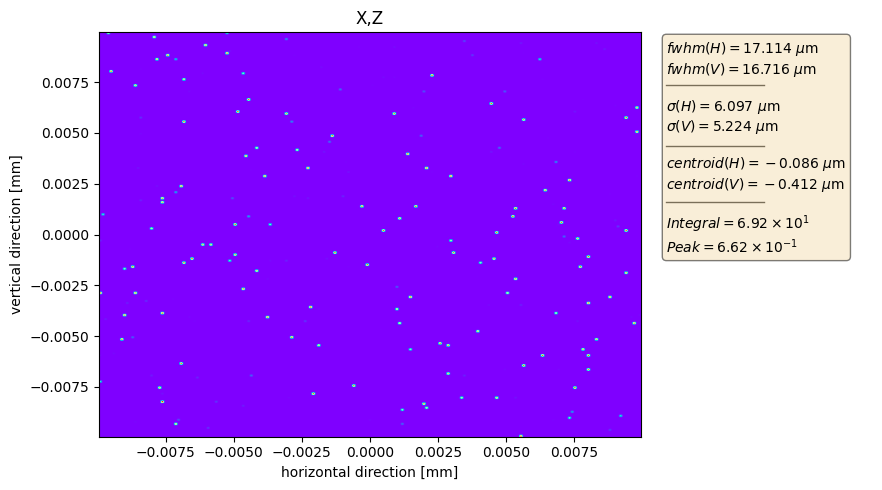

In [7]:
plot_shadow_beam_spatial_distribution(input_beam, xrange=[-0.01, 0.01], yrange=[-0.01, 0.01])

clean_up()